In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
    
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [2]:
#DATA

df= pd.read_csv("D:/Machine Learning Practical/Lab Exercises/Lab 1/Program1/college.csv")
df.head()

,Names,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
#Setting index as Names of the Universities
college=df.set_index('Names')
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Names,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


In [4]:
#changing yes to 1 and no to 0
college = college.replace({'Private': {'Yes': 1, 
                                'No': 0}})
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Names,,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### 1. Fit a linear model using least squares on the training set and report the test error obtained. Predict the number of applications received using the other variables in the College data set.

In [5]:
#Linear Regression using OLS method

X=pd.DataFrame(college.drop("Apps",axis=1))
y=pd.DataFrame(college['Apps'])
    
RMSE=[]
RMSE_E=[]

for j in range(5):
    #ep=[100,250,500,1000,2000]
    test_s=[0.4,0.35,0.3,0.25,0.1]
    for i in range(100):

        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_s[j], random_state=i)

        model=sm.OLS(y_train,X_train).fit()
        y_pred=model.predict(X_train)

        rmse=np.mean(np.square(np.array(y_pred)-np.array(y_train)))

        RMSE.append(rmse)
        
    RMSE_E.append(np.mean(RMSE))




In [6]:
RMSE_E

[28838049.41915805,
 28707780.250843424,
 28697835.764541373,
 28743076.551463872,
 28775707.496863518]

C:\Users\jesto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'RMSE FOR TRAIN DATA')]

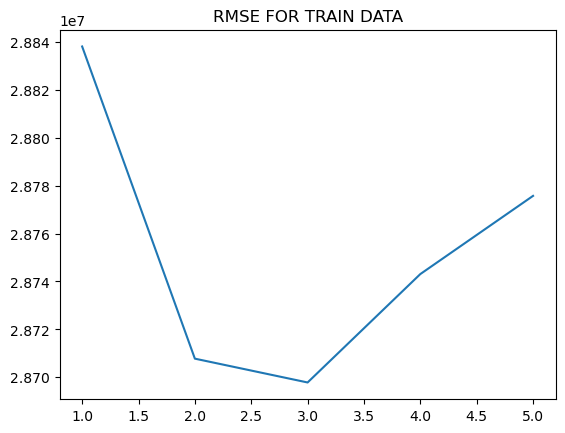

In [7]:
#plotting the RMSE for different models
x=[1,2,3,4,5]
sns.lineplot(x,RMSE_E).set(title="RMSE FOR TRAIN DATA")

C:\Users\jesto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'RMSE FOR TRAIN DATA')]

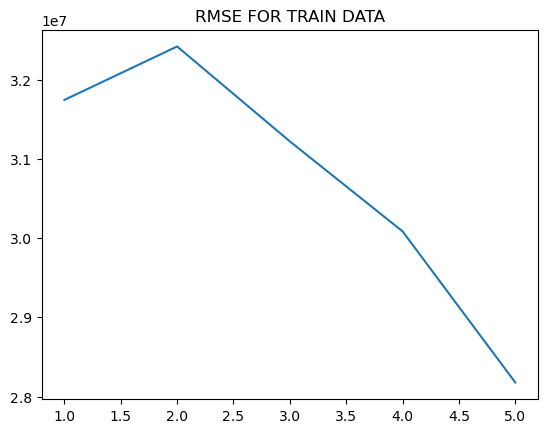

In [8]:
#Increasing the training size 5 times and plotting the RMSE

X=pd.DataFrame(college.drop("Apps",axis=1))
y=pd.DataFrame(college['Apps'])
    
RMSE=[]
RMSE_E=[]

for j in range(5):
    #ep=[100,250,500,1000,2000]
    test_s=[0.4,0.35,0.3,0.25,0.1]

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_s[j], random_state=1)

    model=sm.OLS(y_train,X_train).fit()
    y_pred=model.predict(X_train)

    rmse=np.mean(np.square(np.array(y_pred)-np.array(y_train)))

    RMSE.append(rmse)


#plotting the RMSE for different models
x=[1,2,3,4,5]
sns.lineplot(x,RMSE).set(title="RMSE FOR TRAIN DATA")


### 2. Fit a ridge regression model on the training set.  Report the test error obtained.


In [13]:
X=pd.DataFrame(college.drop("Apps",axis=1))
y=pd.DataFrame(college['Apps'])

RMSE_ridge=[]

a=[0.2,0.5,0.7,0.8,1.1,2,5,7,8,10]
    
for i in range(10):

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

    #model
    model = linear_model.Ridge(alpha=a[i], fit_intercept=True, solver='cholesky').fit(X_train, y_train)
    
    #prediction
    y_pred_ridge = model.predict(X_test)
        
    #MSE
    rmse=np.mean(np.square(np.array(y_pred_ridge)-np.array(y_test)))
    RMSE_ridge.append(rmse)
        
RMSE_ridge

[642884.7164557735,
 643079.6957610454,
 643208.8477380681,
 643273.1731420597,
 643465.146183167,
 644032.0333747849,
 645824.7209575757,
 646939.3705486332,
 647473.5672456964,
 648497.7081802401]

[Text(0.5, 1.0, 'RIDGE-RMSE FOR TEST DATA'),
 Text(0.5, 0, 'Alpha Values'),
 Text(0, 0.5, 'Mean Square Error')]

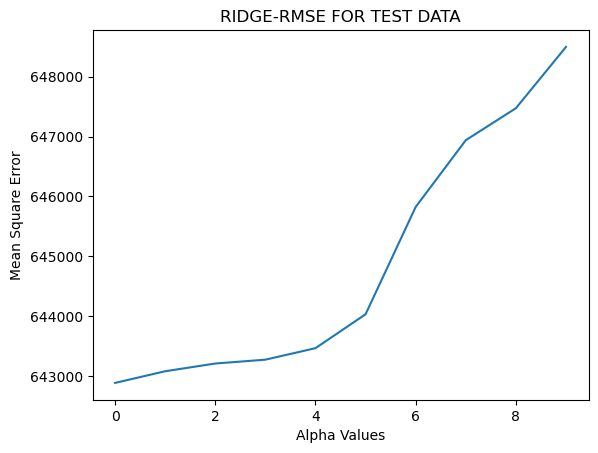

In [16]:
#PLOTTING THE TEST ERROR FOR SUCCESSIVE ALPHA VALUES 
x1=range(10)
sns.lineplot(x1,RMSE_ridge).set(title="RIDGE-RMSE FOR TEST DATA",xlabel="Alpha Values",ylabel="Mean Square Error")

### 3. Fit a lasso model on the training set. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [17]:
X=pd.DataFrame(college.drop("Apps",axis=1))
y=pd.DataFrame(college['Apps'])

RMSE_lasso=[]

a=[0.2,0.5,0.7,0.8,1.1,2,5,7,8,10]
    
for i in range(10):

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
        
    #model
    model = linear_model.Lasso(alpha=a[i], fit_intercept=True, selection='cyclic').fit(X_train, y_train)
    
    #prediction
    y_pred_lasso = model.predict(X_test)
        
    #MSE
    rmse=np.mean(np.square(np.array(y_pred_lasso)-np.array(y_test)))
    RMSE_lasso.append(rmse)
    
RMSE_lasso


[24165242.77196399,
 24166241.711494938,
 24166909.66048792,
 24167244.232497863,
 24168250.343146622,
 24171290.172270034,
 24181655.872360542,
 24188765.515934363,
 24192380.089467943,
 24199728.86624993]

C:\Users\jesto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'LASSO-RMSE FOR TEST DATA'),
 Text(0.5, 0, 'Alpha Values'),
 Text(0, 0.5, 'Mean Square Error')]

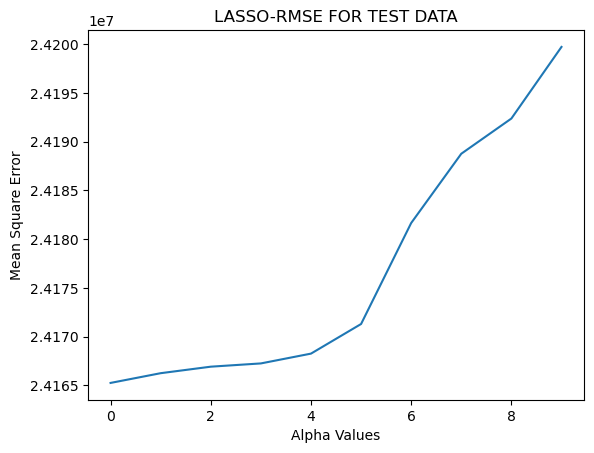

In [18]:
#PLOTTING THE TEST ERROR FOR SUCCESSIVE ALPHA VALUES 
#x1=[0.2,0.5,0.7,0.8,1.1]
sns.lineplot(x1,RMSE_lasso).set(title="LASSO-RMSE FOR TEST DATA",xlabel="Alpha Values",ylabel="Mean Square Error")